# Forecasting Restuarant's Visitors

## Importing the dataset 

In [254]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [255]:
# Loading the dataset
rest = pd.read_csv('RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [256]:
#Viewing the first five rows
rest.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [257]:
#Setting frequency of rest
rest.index.freq = 'D'

## Understanding the data and Data Cleaning

In [258]:
rest.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [259]:
rest.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


Here,we can see there are some missing values for all the four restuarants. We will drop these rows from the dataset.

In [260]:
#Size of the dataset
rest.shape

(517, 8)

In [261]:
# Dropping the missing values
rest1 = rest.dropna()
rest1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [262]:
rest1.shape

(478, 8)

Thus,we initially had data for 517 days and after dropping all the missing rows,we now have data for 478 days in which all the restuarants were actively functioning. We will use this dataset to understand the data and forecast the future. 

In [263]:
rest1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       478 non-null    object 
 1   holiday       478 non-null    int64  
 2   holiday_name  478 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 33.6+ KB


Here,we can see even though the restuarants have interger values,we get the data type as "float64".We will convert that to an integer type for all the restuarants.

In [264]:
rest1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [265]:
# Changing the dtype of selected columns
columns = ['rest1','rest2','rest3','rest4','total']
for col in columns:
    rest1[col] = rest1[col].astype(int)

In [266]:
rest1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


In [267]:
rest1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekday       478 non-null    object
 1   holiday       478 non-null    int64 
 2   holiday_name  478 non-null    object
 3   rest1         478 non-null    int32 
 4   rest2         478 non-null    int32 
 5   rest3         478 non-null    int32 
 6   rest4         478 non-null    int32 
 7   total         478 non-null    int32 
dtypes: int32(5), int64(1), object(2)
memory usage: 24.3+ KB


Thus,we converted all the float type data to integer type.

## Data Visualization 

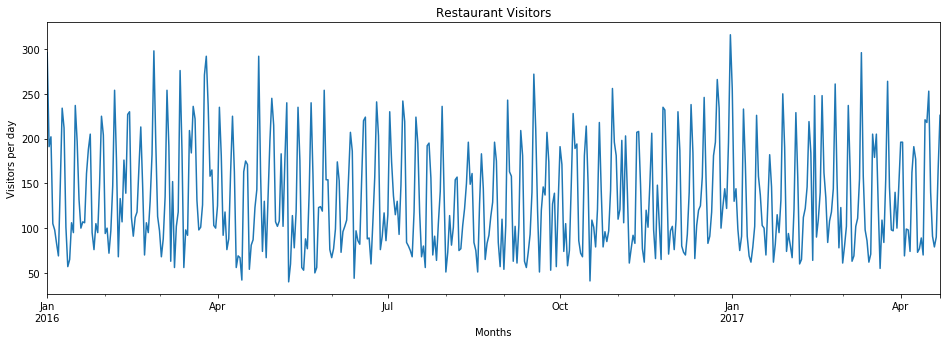

In [268]:
# Plotting restuarants's visitors
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='Months' 

ax = rest1['total'].plot(figsize=(16,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

We can observe that there's some seasonality in the data. We see a number of spikes after regular intervals.Let's see the if it's because of a holiday on that specific date.

In [269]:
# Getting the dates when we had a holiday
rest1[rest1.holiday == 1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

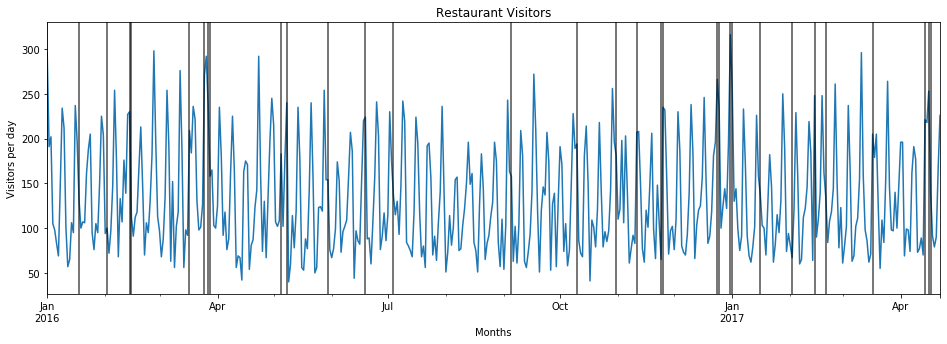

In [270]:
# Plotting holidays with restuarant's visitors
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='Months'

ax = rest1['total'].plot(figsize=(16,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


for day in rest1[rest1.holiday == 1].index:       # for days where holiday == 1
    ax.axvline(x=day, color='k', alpha = 0.7);  # add a semi-transparent grey line

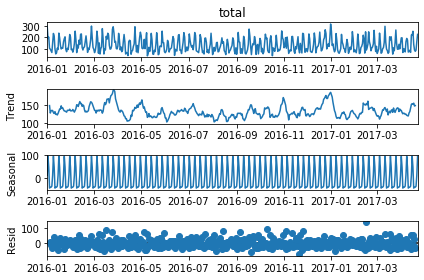

In [271]:
# ETS Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose 
result = seasonal_decompose(rest1['total'])
result.plot();

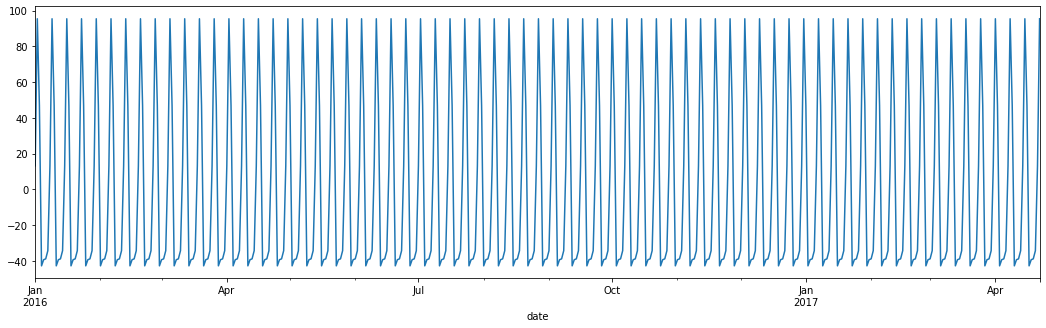

In [272]:
# Checking for seasonality
result.seasonal.plot(figsize=(18,5))

## Checking for Stationarity

In [273]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','Number of lags used','Number of observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:   #p-value < 0.05
        print("\nHere, p-value < 0.05 which means we can reject the null hypothesis.Therefore,the data is stationary")
    else:
        print("\nHere, p-value > 0.05 which means we failed to reject the null hypothesis.Therefore,the data is non- stationary")
       

In [274]:
adf_test(rest1['total'])

Augmented Dickey-Fuller Test: 
ADF test statistic         -5.592497
p-value                     0.000001
Number of lags used        18.000000
Number of observations    459.000000
critical value (1%)        -3.444677
critical value (5%)        -2.867857
critical value (10%)       -2.570135

Here, p-value < 0.05 which means we can reject the null hypothesis.Therefore,the data is stationary


## Building the Model

### Running Auto_arima to get the best order

In [275]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=False, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept=True, sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`

In [276]:
# To get the appropriate orders, we set seasonal=True and pass in an m value
from pmdarima import auto_arima  
auto_arima(rest1['total'],seasonal=True,m=7,max_p = 5, max_q = 5, max_P = 5, max_Q = 5).summary()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(4, 0, 0, 7)   Log Likelihood               -2386.343
Date:                           Sat, 25 Jul 2020   AIC                           4786.685
Time:                                   21:20:36   BIC                           4815.872
Sample:                                        0   HQIC                          4798.160
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.6313      3.815      3.836      0.000       7.155      22.108
ar.L1          0.1612      0.044      3.694      0.000       0.076       0.247
ar.S.L7        0.2279      0.042      5.377      0.000       0.145       0.311
ar.S.L14       0.1846      0.042      4.401      0.000       0.102       0.267
ar.S.L21       0.1913      0.041      4.665      0.000       0.111       0.272
ar.S.L28       0.2610      0.043      6.029      0.000       0.176       0.346
sigma2      1199.9731     68.082     17.625      0.000    1066.535    1333.411
===================================================================================
Ljung-Box (Q):                       64.03   Jarque-Bera (JB):                52.65
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.65
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now,this gives us an ARIMA Order of (1,0,0) and a seasonal order of (4,0,0,7) Now let's train & test the SARIMA model and evaluate it.  

## Splitting the data

In [277]:
rest1.shape

(478, 8)

We'll assign 42 days (6 weeks) to the test set .Thus, we can at least predict for a month in the future properly and we can even get some holidays included in the test set.

In [278]:
# Train-Test split
train = rest1.iloc[:436]
test = rest1.iloc[436:]

In [279]:
train

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98
...,...,...,...,...,...,...,...,...
2017-03-07,Tuesday,0,na,28,9,19,13,69
2017-03-08,Wednesday,0,na,27,19,35,21,102
2017-03-09,Thursday,0,na,63,22,13,13,111


In [280]:
test

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-03-12,Sunday,0,na,46,16,55,41,158
2017-03-13,Monday,0,na,43,24,18,13,98
2017-03-14,Tuesday,0,na,21,14,22,29,86
2017-03-15,Wednesday,0,na,12,18,21,11,62
2017-03-16,Thursday,0,na,30,8,24,9,71
2017-03-17,Friday,1,St. Patrick's Day,73,45,37,50,205
2017-03-18,Saturday,0,na,71,34,30,44,179
2017-03-19,Sunday,0,na,33,25,68,79,205
2017-03-20,Monday,0,na,34,22,19,50,125


Since,we already know the orders for the model i.e. SARIMA(1, 0, 0)x(4, 0, 0, 7),we will fit this model now.

## Fitting a SARIMA(1,0,0)(4,0,0,7) Model 

In [281]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['total'],order=(1,0,0),seasonal_order=(4,0,0,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(4, 0, 0, 7)   Log Likelihood               -2187.233
Date:                           Sat, 25 Jul 2020   AIC                           4386.466
Time:                                   21:20:40   BIC                           4410.932
Sample:                               01-01-2016   HQIC                          4396.121
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2151      0.047      4.593      0.000       0.123       0.307
ar.S.L7        0.2686      0.047      5.766      0.000       0.177       0.360
ar.S.L14       0.2169      0.046      4.750      0.000       0.127       0.306
ar.S.L21       0.2192      0.044      4.955      0.000       0.132       0.306
ar.S.L28       0.2778      0.049      5.679      0.000       0.182       0.374
sigma2      1266.7483     66.569     19.029      0.000    1136.275    1397.221
===================================================================================
Ljung-Box (Q):                       69.26   Jarque-Bera (JB):                57.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.58
Prob(H) (two-sided):                  0.95   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [282]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMA(1,0,0)(4,0,0,7) Predictions')

In [283]:
# Comparing real Vs predicted values
print(test['total'].head())
predictions.head()

date
2017-03-12    158
2017-03-13     98
2017-03-14     86
2017-03-15     62
2017-03-16     71
Freq: D, Name: total, dtype: int32


2017-03-12    176.874969
2017-03-13     83.787901
2017-03-14    133.116190
2017-03-15     89.427330
2017-03-16    103.611539
Freq: D, Name: SARIMA(1,0,0)(4,0,0,7) Predictions, dtype: float64

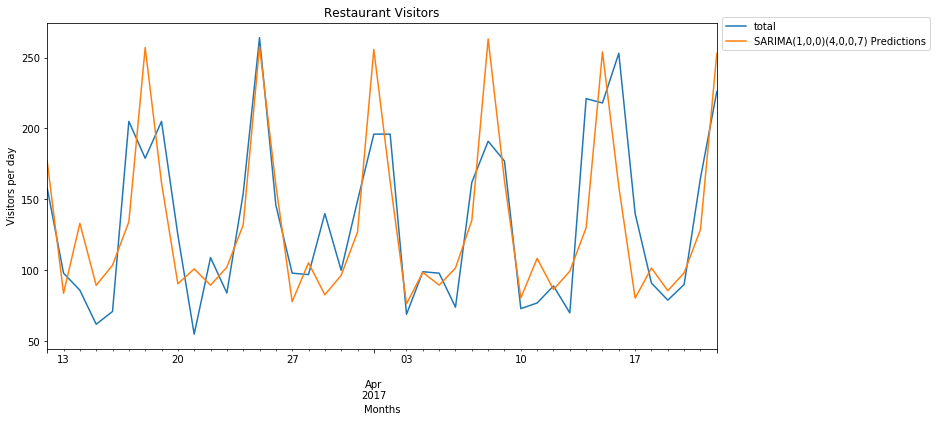

In [284]:
# Plotting predictions against real data
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='Months'

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc=3, bbox_to_anchor=(1.0,0.9));

As,we can see our predictions missed certain real peaks. Let's see is it beacause of holidays or not.

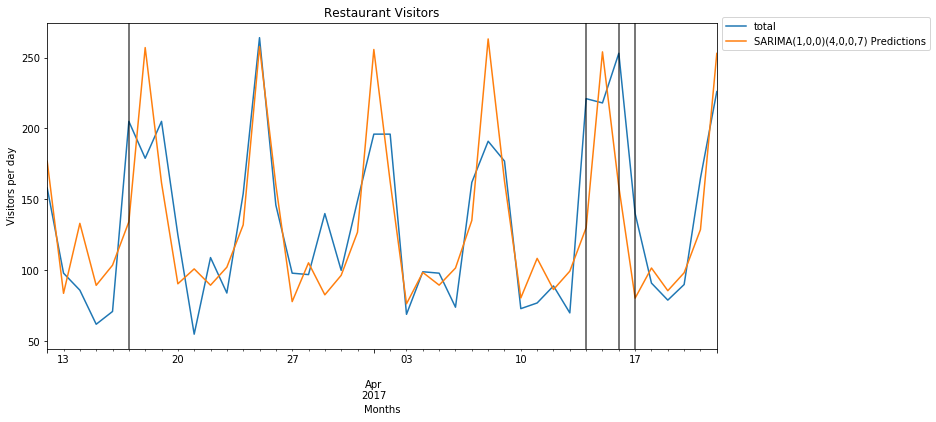

In [285]:
# Plotting predictions against real data with holidays
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='Months'

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc=3, bbox_to_anchor=(1.0,0.9));

for day in test[test.holiday == 1].index:       # for days where holiday == 1
    ax.axvline(x=day, color='k', alpha = 0.7);

As we can see above,maybe we can get better predictions if we consider holidays too.

## Evaluating the model 

In [286]:
test['total'].mean()

134.26190476190476

In [287]:
predictions.mean()

132.69201423371592

In [288]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(test['total'], predictions)
error2 = rmse(test['total'], predictions)

print(f'SARIMA(1,0,0)(4,0,0,7) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,0)(4,0,0,7) RMSE Error: {error2:11.10}')

SARIMA(1,0,0)(4,0,0,7) MSE Error: 1533.228402
SARIMA(1,0,0)(4,0,0,7) RMSE Error: 39.15646055


Thus,for SARIMA(1,0,0)(4,0,0,7) we get an RMSE Error of 39.15646055.

## Adding holidays 

We saw how holidays can have an impact on the total number of customers daily.So,let's include it in the model as an exogenous variable and observe the predictions.

## Building the model with exogenous variable(holiday)

In [289]:
# Buidling the SARIMAX model
model = SARIMAX(train['total'],exog=train['holiday'],order=(1,0,0),seasonal_order=(4,0,0,7),enforce_invertibility=False)
results = model.fit()
results.summary()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(4, 0, 0, 7)   Log Likelihood               -2119.022
Date:                           Sat, 25 Jul 2020   AIC                           4252.045
Time:                                   21:21:01   BIC                           4280.588
Sample:                               01-01-2016   HQIC                          4263.309
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       66.2649      4.176     15.868      0.000      58.080      74.449
ar.L1          0.2256      0.046      4.875      0.000       0.135       0.316
ar.S.L7        0.2220      0.050      4.452      0.000       0.124       0.320
ar.S.L14       0.1919      0.050      3.814      0.000       0.093       0.291
ar.S.L21       0.2126      0.046      4.661      0.000       0.123       0.302
ar.S.L28       0.3634      0.044      8.188      0.000       0.276       0.450
sigma2       941.8608     57.003     16.523      0.000     830.137    1053.585
===================================================================================
Ljung-Box (Q):                       77.81   Jarque-Bera (JB):                16.28
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.18
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Here,we can already see that we have a lower AIC value as compared to the previous models. 

In [290]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['holiday']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(1,0,0)(4,0,0,7) Predictions')

In [291]:
# Comparing real Vs predicted values
print(test['total'].head())
predictions.head()

date
2017-03-12    158
2017-03-13     98
2017-03-14     86
2017-03-15     62
2017-03-16     71
Freq: D, Name: total, dtype: int32


2017-03-12    180.834999
2017-03-13     69.716833
2017-03-14    123.524965
2017-03-15     90.177304
2017-03-16    105.093467
Freq: D, Name: SARIMAX(1,0,0)(4,0,0,7) Predictions, dtype: float64

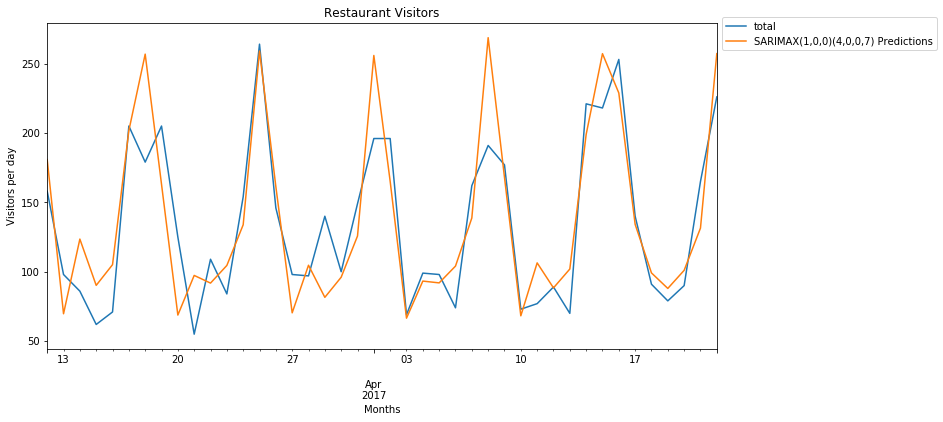

In [292]:
# Plotting predictions against real data 
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='Months'

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc=3, bbox_to_anchor=(1.0,0.9));

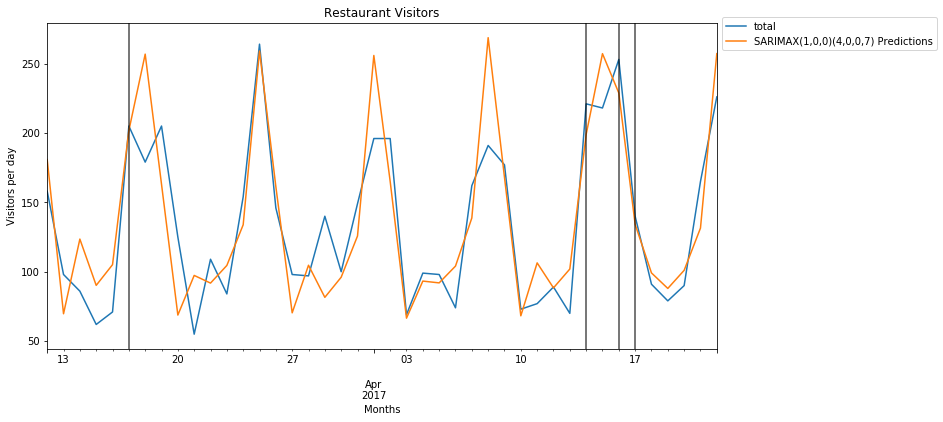

In [293]:
# Plotting predictions against real data 
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='Months'

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc=3, bbox_to_anchor=(1.0,0.9));

for day in test[test.holiday == 1].index:       # for days where holiday == 1
    ax.axvline(x=day, color='k', alpha = 0.7);

We can see that the exogenous variable(holiday) had a positive impact on the forecast. Our model can catch all the holidays now.Let's see if this model is better than our previous one.

## Evaluating the model 

In [294]:
test['total'].mean()

134.26190476190476

In [295]:
predictions.mean()

138.06964807812332

In [296]:
from statsmodels.tools.eval_measures import mse,rmse

error1exo = mse(test['total'], predictions)
error2exo = rmse(test['total'], predictions)

print(f'SARIMAX(1,0,0)(4,0,0,7) MSE Error: {error1exo:11.10}')
print(f'SARIMAX(1,0,0)(4,0,0,7) RMSE Error: {error2exo:11.10}')

SARIMAX(1,0,0)(4,0,0,7) MSE Error: 1017.482122
SARIMAX(1,0,0)(4,0,0,7) RMSE Error: 31.89799559


Thus,for SARIMAX(1,0,0)(4,0,0,7) with an exogenous variable(hoilday) we get an RMSE Error of 31.89799559.

In [297]:
#Comparing both the models

# Print values from SARIMA above
print(f'SARIMA(1,0,0)(4,0,0,7) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,0)(4,0,0,7) RMSE Error: {error2:11.10}')
print()

error1exo = mse(test['total'], predictions)
error2exo = rmse(test['total'], predictions)

# Print new SARIMAX values with exogenous variable(holiday)
print(f'SARIMAX(1,0,0)(4,0,0,7) MSE Error: {error1exo:11.10}')
print(f'SARIMAX(1,0,0)(4,0,0,7) RMSE Error: {error2exo:11.10}')

SARIMA(1,0,0)(4,0,0,7) MSE Error: 1533.228402
SARIMA(1,0,0)(4,0,0,7) RMSE Error: 39.15646055

SARIMAX(1,0,0)(4,0,0,7) MSE Error: 1017.482122
SARIMAX(1,0,0)(4,0,0,7) RMSE Error: 31.89799559


## Forecasting 

We will retrain the model on the entire data, and forecast the future

We're going to forecast 39 days into the future and we'll use the additional holiday data as the exogenous variable for it.

### Retraining the model on the entire data 

In [300]:
model = SARIMAX(rest1['total'],exog=rest1['holiday'],order=(1,0,0),seasonal_order=(4,0,0,7),enforce_invertibility=False)
results = model.fit()
exog_forecast = rest[478:][['holiday']]
forecast = results.predict(len(rest1),len(rest1)+38,exog=exog_forecast).rename('SARIMAX(1,0,0)(2,0,0,7) Forecast')

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


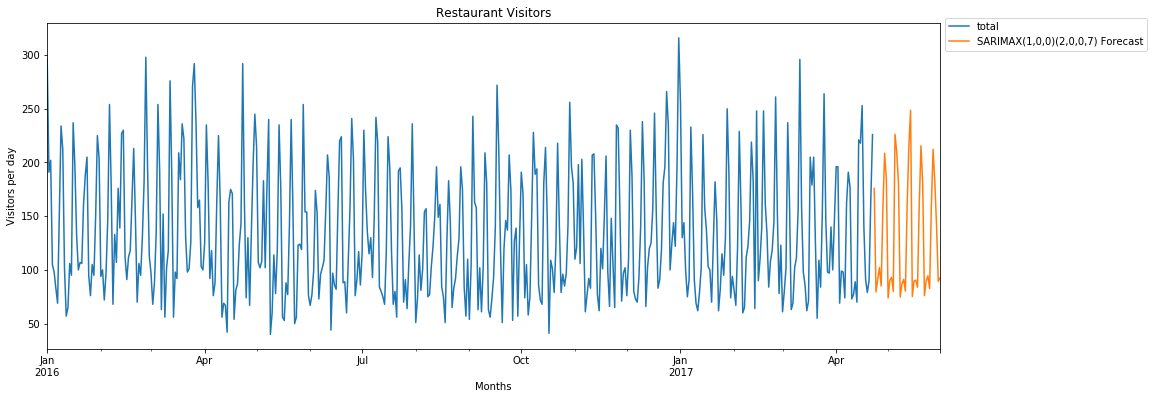

In [305]:
# Plotting the forecast with the past values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='Months'

ax = rest1['total'].plot(legend=True,figsize=(16,6),title=title)
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc=3, bbox_to_anchor=(1.0,0.9));

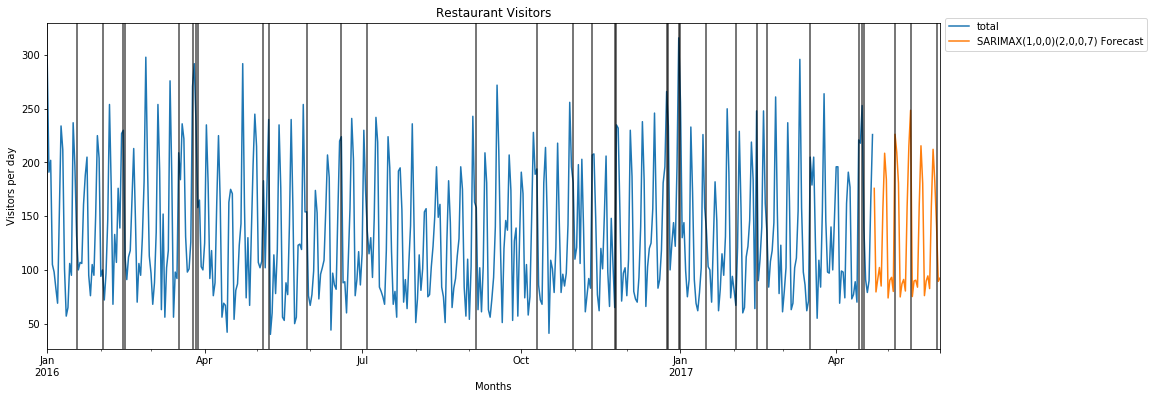

In [309]:
# Plotting the forecast with the past values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='Months'

ax = rest1['total'].plot(legend=True,figsize=(16,6),title=title)
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc=3, bbox_to_anchor=(1.0,0.9));

for day in rest[rest.holiday == 1].index:       # for days where holiday == 1
    ax.axvline(x=day, color='k', alpha = 0.7);